<a href="https://www.kaggle.com/code/osamaahmedcdsp/eda-titanic-project?scriptVersionId=148325740" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Project
    * Exploring Data
    * Bivariate Analysis
    * Univariate Analysis
    * Multivariate Analysis

# Exploring Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
sns.set()

In [2]:
df=pd.read_csv("/kaggle/input/titanic/Train.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Duplicated Valuse :
df.duplicated().sum()
# if there is any duplicated , we can drop them by :
# df.drop_duplicated(inplace=True)

0

In [6]:
# Missing Value :
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Get the (Maen) of every Null :
round((df.isnull().mean())*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [8]:
# Due to 'Embarked'has 22% as missing Data, We can chose between (drop it) or (fill NA) :
# 1) Drop :
    # df.dropna(subset=['Embarked'],inplace=True)
    # Or :
    # df=df.dropna(subset=['Embarked']) as "inplace=True" uses to update the order in same variavle "df"
# 2) FillNA :
    # df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [9]:
# FillNA for Embarked :
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
df.isna().sum() # Same as df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

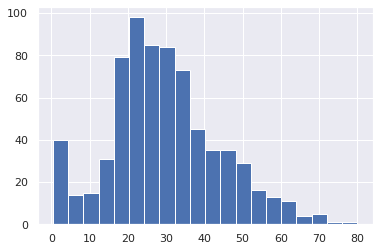

In [12]:
df.Age.hist(bins=20);

In [13]:
# to fill NA with a spacific vaule :
# df.fillna(df.Age.mean(),inplace=True) or df=df.fillna(df.Age.mean())

In [14]:
# to explore a summary by 2 methods :
df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [17]:
# To fill NA of Age Based on Bclass & Sex :
df['Age']=df.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))

In [18]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [20]:
# to drop the unneeded columns :
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [21]:
df.columns=df.columns.str.lower()

In [22]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

# Univarial Analysis

In [23]:
# Univarial Analysis
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [24]:
# get data count avg
df.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

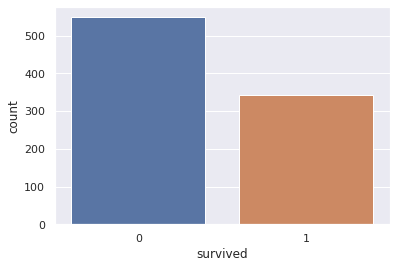

In [25]:
sns.countplot(x='survived',data=df);

In [26]:
""" To generlize & to be easy to apply the needed for multiple categories,
    we can define function with view & visulise 
    ('survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked')
"""
def explore_categorical(df,col):
    print(col.upper())
    print(df[col].value_counts(normalize=True))
    sns.countplot(x=col, data=df);
    plt.show()

PCLASS
3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64


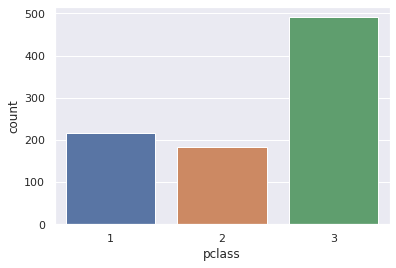

SIBSP
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64


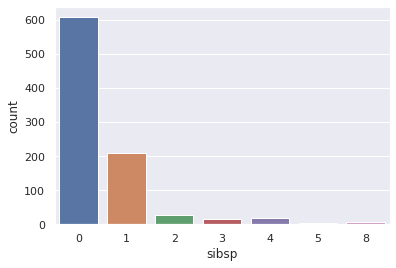

PARCH
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64


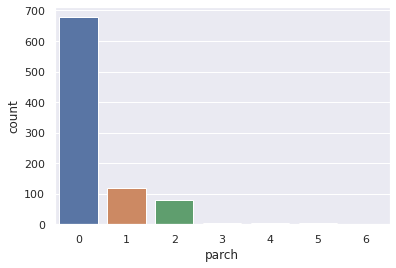

EMBARKED
S    0.725028
C    0.188552
Q    0.086420
Name: embarked, dtype: float64


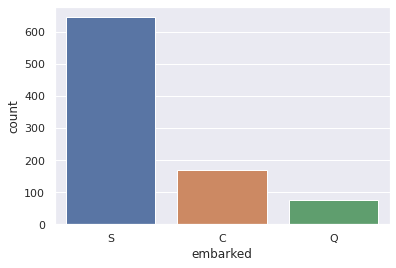

SEX
male      0.647587
female    0.352413
Name: sex, dtype: float64


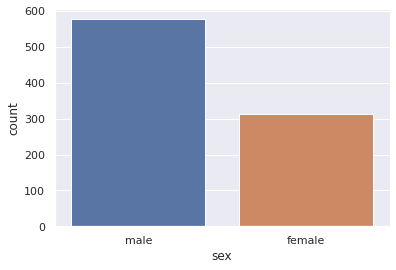

In [27]:
for col in ['pclass', 'sibsp', 'parch','embarked','sex']:
    explore_categorical(df,col)

In [28]:
"""
Define Nomirical Function with histplot diagram
"""
def explore_countinuous (df,col):
    print(col.upper()," :")
    print(df[col].describe())
    sns.histplot(x=col,data=df);
    plt.show()

AGE  :
count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64


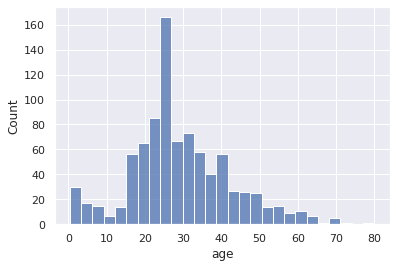

FARE  :
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


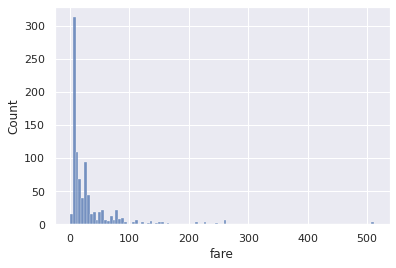

In [29]:
df.dtypes
for col in ['age','fare']:
    explore_countinuous(df,col)

# Bivariate Analysis

In [30]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
431,1,3,female,21.5,1,0,16.1000,S
410,0,3,male,25.0,0,0,7.8958,S
139,0,1,male,24.0,0,0,79.2000,C
5,0,3,male,25.0,0,0,8.4583,Q
531,0,3,male,25.0,0,0,7.2292,C


In [31]:
df.groupby('pclass').survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

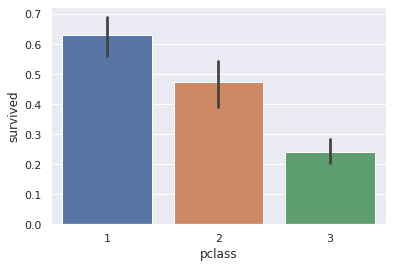

In [32]:
sns.barplot(x='pclass', y='survived',data=df);

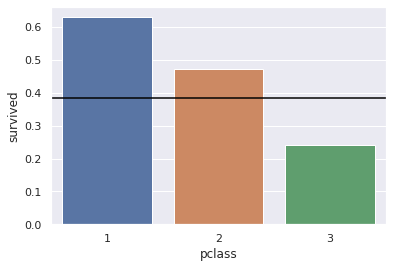

In [33]:
sns.barplot(x='pclass',y='survived',data=df,ci=None);
plt.axhline(df.survived.mean(),color='black',linestyle='-');
plt.show()

In [34]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
653,1,3,female,21.5,0,0,7.8292,Q
222,0,3,male,51.0,0,0,8.0500,S
783,0,3,male,25.0,1,2,23.4500,S
285,0,3,male,33.0,0,0,8.6625,C
505,0,1,male,18.0,1,0,108.9000,C


In [35]:
# define a function to see all categorical columns vs survived with general survived rate
def survived_rate(df,col):
    print(df.groupby(col).survived.mean());
    sns.barplot(x=col,y='survived',data=df,ci=None);
    plt.axhline(df.survived.mean(),color='black',linestyle='--')
    plt.axhline(df.survived.max(),color='black',linestyle='-.')
    plt.show()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


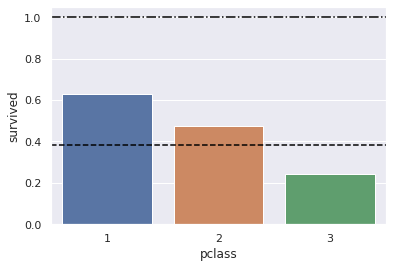

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


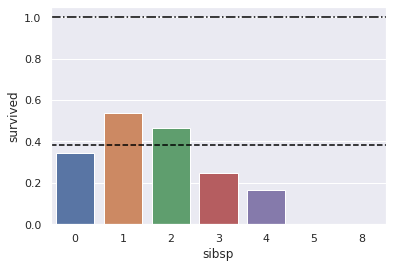

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


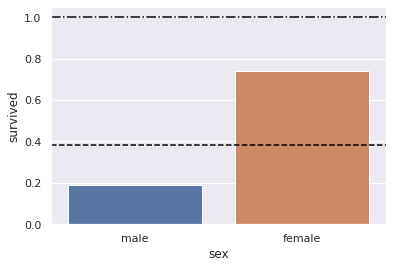

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64


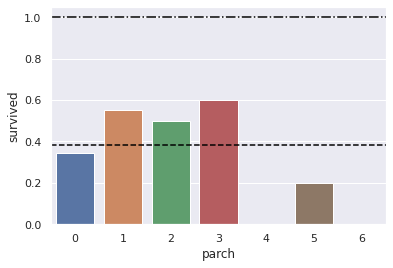

embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64


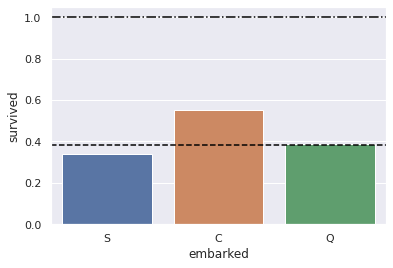

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


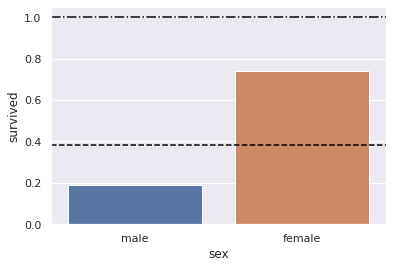

In [36]:
for col in ['pclass','sibsp','sex','parch','embarked','sex']:
    survived_rate(df,col)

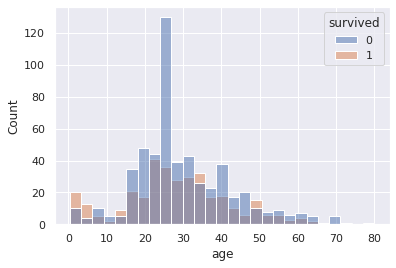

In [37]:
sns.histplot(x='age',data=df,hue='survived');

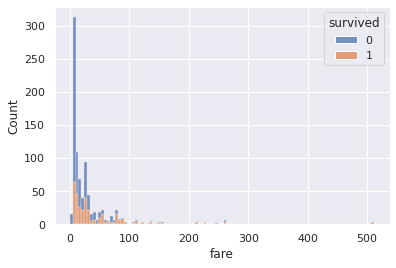

In [38]:
sns.histplot(x='fare',data=df,hue='survived',multiple='stack');

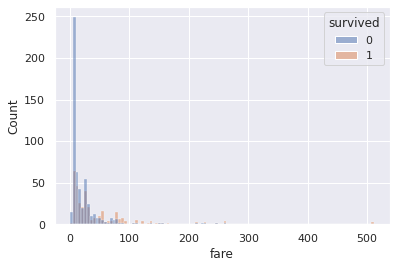

In [39]:
sns.histplot(x='fare',data=df,hue='survived');

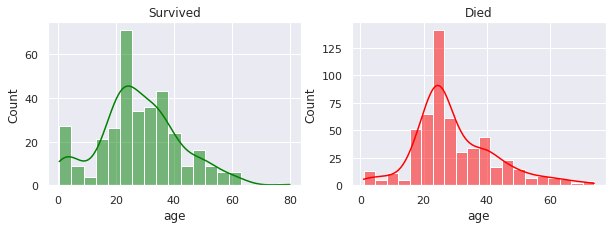

In [40]:
# subplot for age :
# Step 1 : Setup the subplot (fig & ax) grafs using matplatlip (plt.Subplot)
# Step 2 : Setup 2 variables for both "Survived(=1) & Died (=0)" Cases :
# Step 3 : Drow the dual Grafs by histpolt :
# Step 4 : Define Titles :
# Step 5 : Show grafs 
fig,ax=plt.subplots(1,2,figsize=(10,3)) # Step 1 subplot Setup

df_survived=df[df.survived==1]         # Step 2 variables
df_died=df[df.survived==0]

sns.histplot(x='age',data=df_survived,ax=ax[0],kde=True,color='green') #Setp 3 Drow the grafs
sns.histplot(x='age',data=df_died,ax=ax[1],kde=True,color='red')

ax[0].set_title('Survived') # Step 4 Defile Titles
ax[1].set_title('Died')

plt.show() # Show grafs

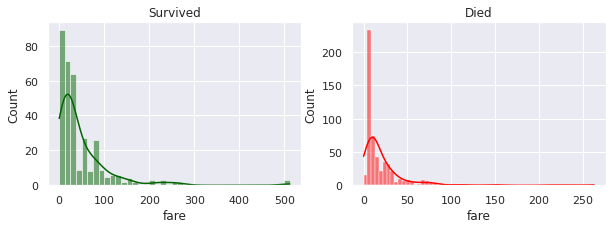

In [41]:
# subplot for far :
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.histplot(x='fare',data=df_survived,ax=ax[0],kde=True,color='darkgreen')
sns.histplot(x='fare',data=df_died,ax=ax[1],kde=True,color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

In [42]:
df.groupby('sex')[['age','fare']].mean()

,age,fare
sex,,
female,27.261146,44.479818
male,30.119879,25.523893


In [43]:
df.describe()[['age','fare']]

,age,fare
count,891.000000,891.000000
mean,29.112424,32.204208
std,13.304424,49.693429
min,0.420000,0.000000
25%,21.500000,7.910400
50%,26.000000,14.454200
75%,36.000000,31.000000
max,80.000000,512.329200


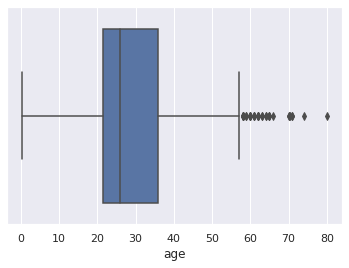

In [44]:
sns.boxplot(x='age',data=df);

<AxesSubplot:xlabel='fare'>

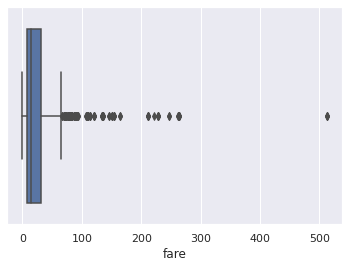

In [45]:
sns.boxplot(x='fare',data=df)

# Outliers Detection : (remove outlires)
    Q1 25%
    Q3 75%
    IQR Q3 - Q1

In [46]:
# Remove Quantile Values :
def remove_outlires(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3-(1.5*iqr)
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

# df=remove_outliers(df,'fare')

In [47]:
df=df[df.fare < 300]

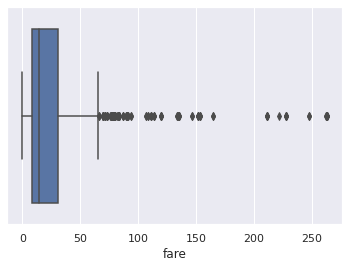

In [48]:
sns.boxplot(x='fare',data=df);

In [49]:
df.fare.describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: fare, dtype: float64

# Split into Groups
* Cut

In [50]:
# Spliting Age in Groups (Child , Young , adult, ''Senior)
df['age_group']=pd.cut(df.age,bins=[0,22,27,37,82],labels=['child','young','afult','seniro'])
df['fare_group']=pd.cut(df.fare,bins=[-0.99,8,15,35,265],labels=['low','mediam','high','very high'])

age_group
child     0.450549
young     0.260000
afult     0.427184
seniro    0.363636
Name: survived, dtype: float64


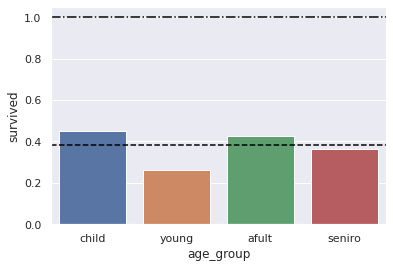

fare_group
low          0.215768
mediam       0.285714
high         0.446809
very high    0.615385
Name: survived, dtype: float64


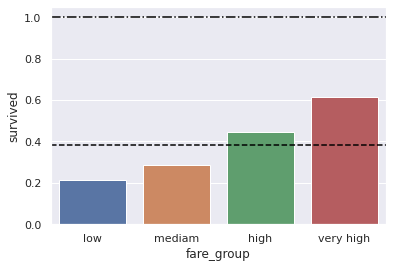

In [51]:
for col in ['age_group','fare_group']:
    survived_rate(df,col)   

In [52]:
# Create New Feature: "family_size" to combine "parch" and " sibsp" and explore it with Survival Rate
df['family_size']=df.parch+df.sibsp
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'age_group', 'fare_group', 'family_size'],
      dtype='object')

In [53]:
df.embarked.describe()
df.groupby('embarked')['sex'].describe()

,count,unique,top,freq
embarked,,,,
C,165,2,male,93
Q,77,2,male,41
S,646,2,male,441


family_size
0     0.300935
1     0.550000
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: survived, dtype: float64


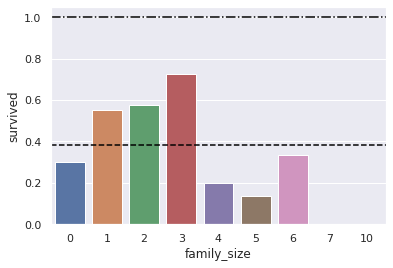

In [54]:
# How many passengers were alone? What is their Survival Rate ?
for col in ['family_size']:
    survived_rate(df,col)

In [55]:
# How many passengers were alone? What is their Survival Rate ?
print("How many passengers were alone?\n",df['family_size'].value_counts()[0])


How many passengers were alone?
 535


In [56]:
# What is their Survival Rate ?
print("\nWhat is their Survival Rate ?")
df['family_size'].value_counts()[0]/df['family_size'].value_counts().sum()


What is their Survival Rate ?


0.6024774774774775

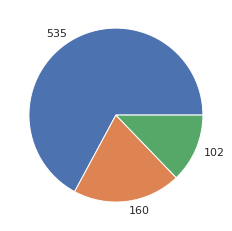

In [57]:
# What are top 3 categories from "family_size" have highest survival Rate ?
df.groupby('family_size').survived.count().head(3) # Way 1
Top=df.groupby('family_size').survived.count().nlargest(3) # Way 2
fig,ax=plt.subplots()
ax.pie(Top,labels=Top);

newage_group
baby      0.593750
child     0.578947
young     0.389474
adult     0.344828
senior    0.363636
Name: survived, dtype: float64


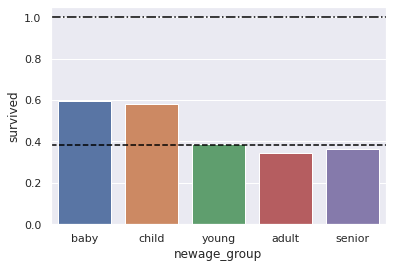

sex
female    0.741214
male      0.186087
Name: survived, dtype: float64


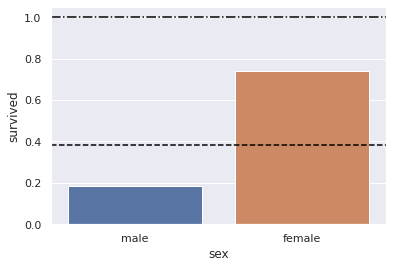

In [58]:
# Try differnet age groups
df['newage_group']=pd.cut(df.age,bins=[0,10,15,22,37,85],labels=['baby','child','young','adult','senior'])
df.groupby('newage_group')['survived'].count()
for col in ['newage_group','sex']:
    survived_rate(df,col)

# Multivarial

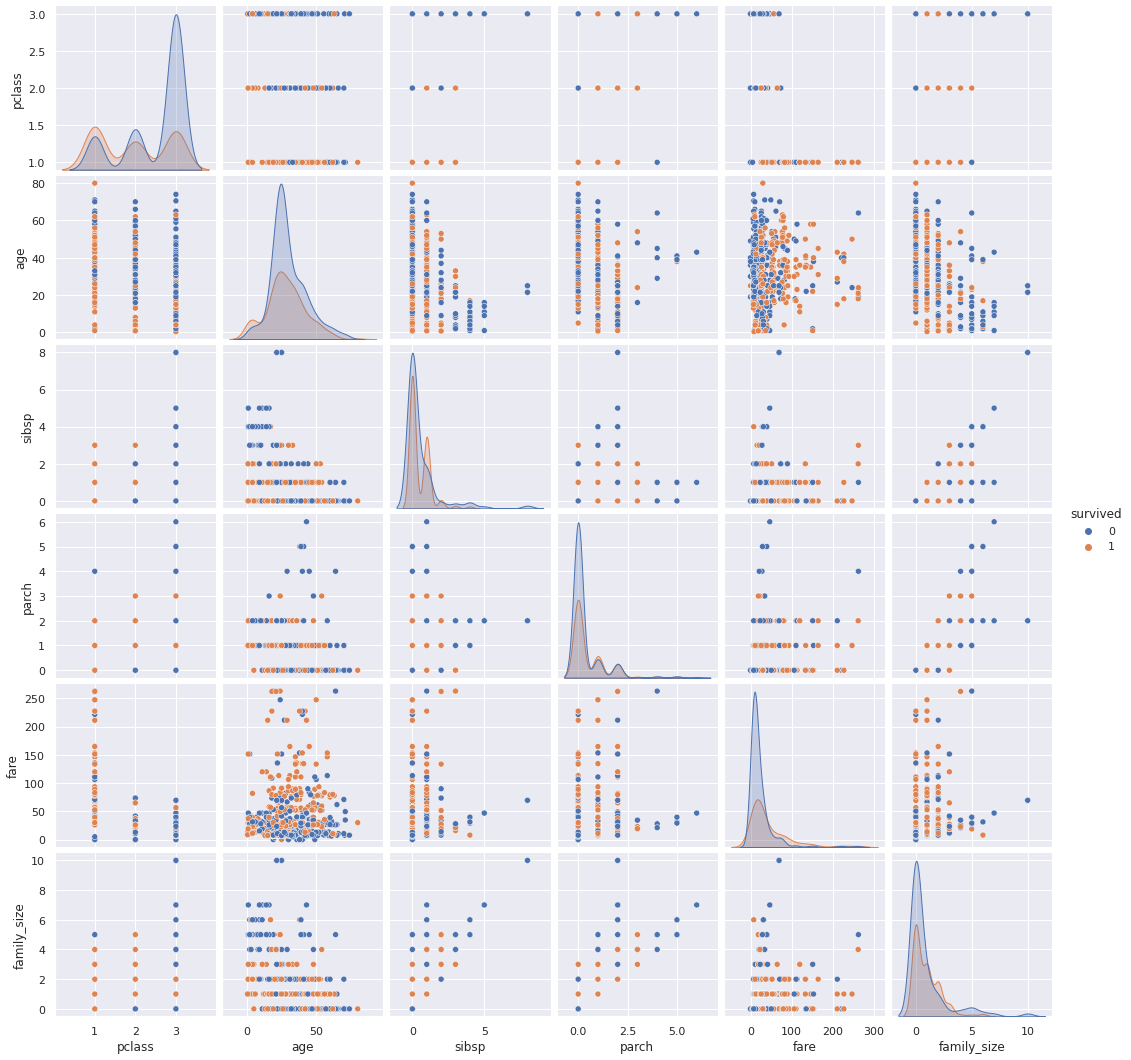

In [59]:
# pariplot
sns.pairplot(df,hue='survived')

In [60]:
df.corr()
df.corr().survived

survived       1.000000
pclass        -0.334068
age           -0.061773
sibsp         -0.033395
parch          0.082157
fare           0.261742
family_size    0.018211
Name: survived, dtype: float64

<AxesSubplot:>

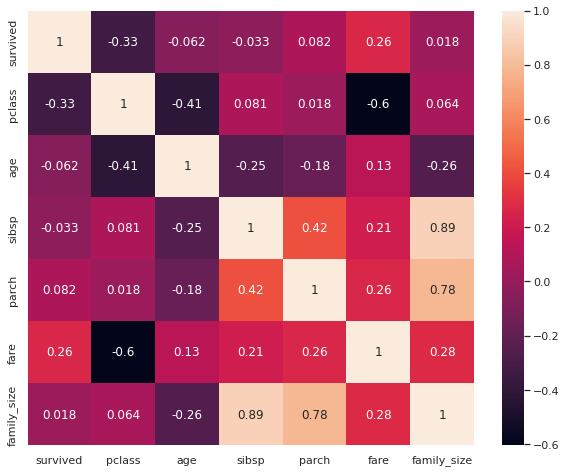

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='pclass', ylabel='survived'>

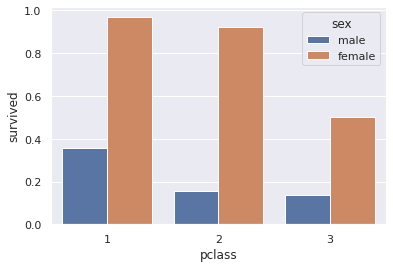

In [62]:
sns.barplot(x='pclass',y='survived',data=df,hue='sex',ci=None)

<AxesSubplot:xlabel='embarked', ylabel='survived'>

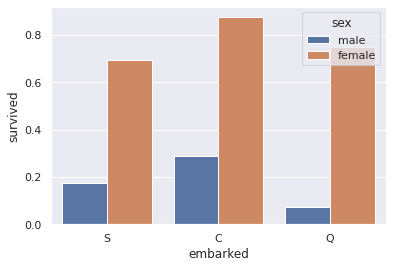

In [63]:
sns.barplot(x='embarked',y='survived',data=df,hue='sex',ci=None)

In [64]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'age_group', 'fare_group', 'family_size', 'newage_group'],
      dtype='object')

# Conclusion

In [65]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_group,fare_group,family_size,newage_group
0,0,3,male,22.0,1,0,7.25,S,child,low,1,young


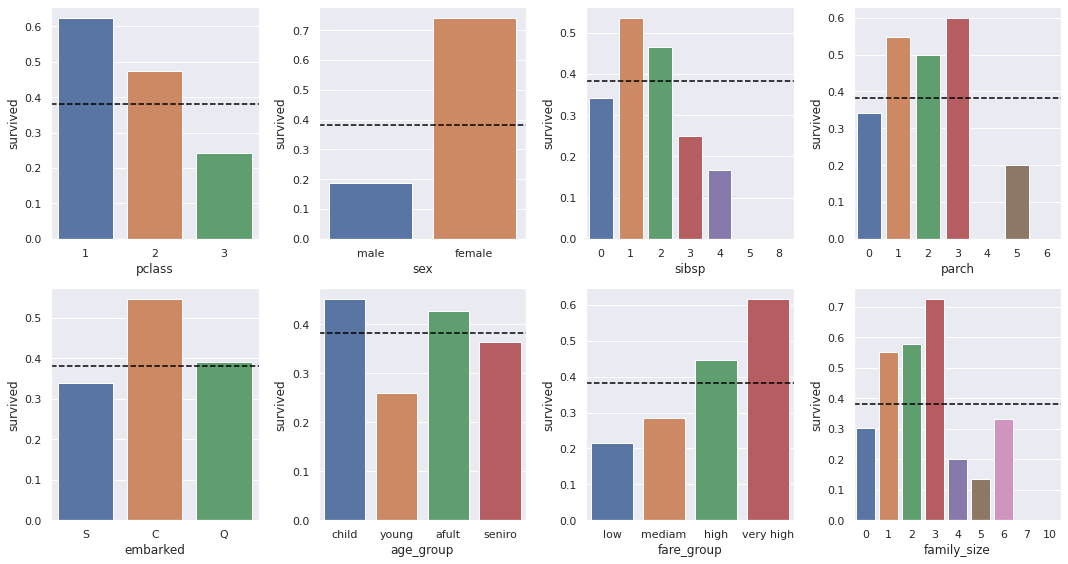

In [66]:
# Creta 7 subplots for all :
# Setp 1 : setup 'subplots' setting for (fig & ax)
# Setp 2 : create for loop with list the columns name with two variables i (for ax) & Col (for Columns)
    # drow 'barplots' with x (for col) , y for (survived)
# Step 3 : show charts

fig,ax=plt.subplots(2,4,figsize=(15,8))
for i , col in enumerate(['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'age_group', 'fare_group', 'family_size']):
    sns.barplot(x=col,y='survived',data=df,ci=None,ax=ax[i//4,i%4])
    ax[i//4,i%4].axhline(df.survived.mean(),color="black",linestyle="--")
plt.tight_layout()
plt.show()

In [67]:
female_df=df[df.sex=='female']
male_df=df[df.sex=='male']

In [68]:
female_df.survived.value_counts(normalize=True)

1    0.741214
0    0.258786
Name: survived, dtype: float64

In [69]:
male_df.survived.value_counts(normalize=True)

0    0.813913
1    0.186087
Name: survived, dtype: float64

In [70]:
female_df.groupby('pclass').survived.mean(0)

pclass
1    0.967742
2    0.921053
3    0.500000
Name: survived, dtype: float64

<AxesSubplot:xlabel='pclass', ylabel='survived'>

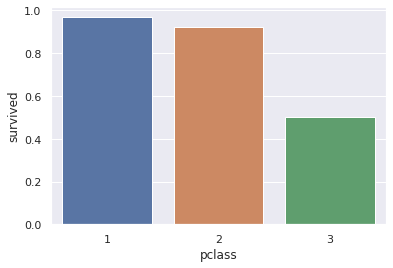

In [71]:
sns.barplot(x='pclass',y='survived',data=female_df,ci=None)

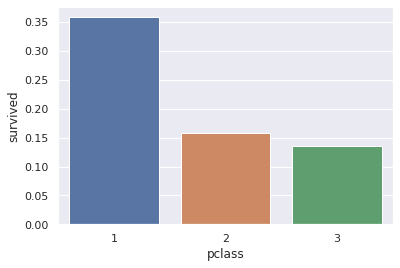

In [72]:
sns.barplot(x='pclass',y='survived',data=male_df,ci=None);

In [73]:
# mearg two data frame :
sex_class=pd.merge(female_df.groupby('pclass').survived.mean(),male_df.groupby('pclass').survived.mean(),on='pclass')
sex_class

,survived_x,survived_y
pclass,,
1,0.967742,0.358333
2,0.921053,0.157407
3,0.500000,0.135447


In [74]:
df.groupby('pclass').survived.mean().nsmallest()

pclass
3    0.242363
2    0.472826
1    0.624413
Name: survived, dtype: float64